In [7]:
import cv2
import numpy as np

# def segment_tire(image_path, save_path):
def segment_tire(image_path, save_path):
    # Read the input image
    original_image = cv2.imread(image_path)

    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

    # Define the color range for the tire in HSV
    lower_color = np.array([0, 0, 0])  # Adjust these values based on your tire color
    upper_color = np.array([179, 255, 100])  # Adjust these values based on your tire color

    # Create a binary mask using color thresholding
    mask = cv2.inRange(hsv_image, lower_color, upper_color)

    # Apply a morphological operation (optional)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through contours and find the largest one (assuming it's the tire)
    max_contour = max(contours, key=cv2.contourArea)

    # Create an empty mask and draw the largest contour on it
    segmented_tire_mask = np.zeros_like(mask)
    cv2.drawContours(segmented_tire_mask, [max_contour], 0, 255, -1)

    # Bitwise AND the original image with the segmented mask
    segmented_tire = cv2.bitwise_and(original_image, original_image, mask=segmented_tire_mask)

    # Save the segmented tire image
    cv2.imwrite(save_path, segmented_tire)

    # Display the result
    cv2.imshow("Original Image", original_image)
    cv2.imshow("Segmented Tire", segmented_tire)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Replace 'your_image_path.jpg' with the actual path to your image file
segment_tire('images/tyre1.jpg', save_path='images/segmented_tire1.jpeg')
# segment_tire('images/tyre2.jpg', save_path='images/segmented_tire2.jpeg')
# segment_tire('images/tyre3.jpg', save_path='images/segmented_tire3.jpeg')


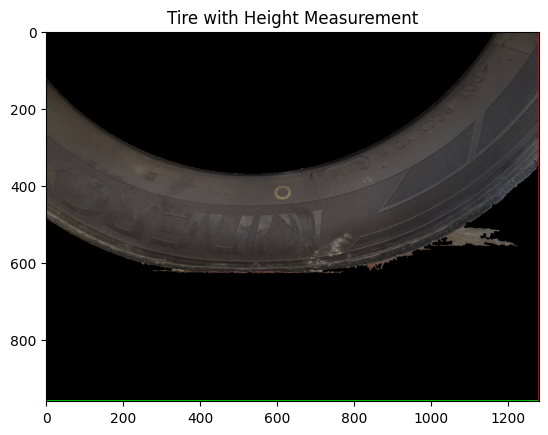

Tire Height: 959 pixels


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_height(rect):
    # Get the four points of the rotated rectangle
    box = cv2.boxPoints(rect)
    box = np.intp(box)

    # Calculate the vertical height from the bottom point to the top point on the bounding box
    bottom_point = tuple(box[2])  # Assuming the bottom point is the third point
    top_point = tuple(box[1])  # Assuming the top point is the second point
    height = abs(int(bottom_point[1]) - int(top_point[1]))

    return height, bottom_point, top_point

def compute_tire_height(image_path):
    # Read the input image
    original_image = cv2.imread(image_path)

    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

    # Define the color range for the tire in HSV
    lower_color = np.array([0, 0, 0])  # Adjust these values based on your tire color
    upper_color = np.array([179, 255, 70])  # Adjust these values based on your tire color

    # Create a binary mask using color thresholding
    mask = cv2.inRange(hsv_image, lower_color, upper_color)

    # Apply a morphological closing operation to fill gaps and smooth contours
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area
    min_contour_area = 50  # Adjust this value based on your specific case
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Iterate through contours and find the largest one (assuming it's the tire)
    max_contour = max(contours, key=cv2.contourArea)

    # Fit a bounding box around the contour
    rect = cv2.minAreaRect(max_contour)

    # Calculate the height of the tire
    height, bottom_point, top_point = calculate_height(rect)

    # Draw the bounding box and vertical line on the original image
    box = cv2.boxPoints(rect)
    box = np.intp(box)
    cv2.drawContours(original_image, [box], 0, (0, 255, 0), 2)
    cv2.line(original_image, tuple(bottom_point), tuple(top_point), (0, 0, 255), 2)  # Red line indicating height

    # Display the result using matplotlib
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Tire with Height Measurement')
    plt.show()

    return height

# Replace 'your_image_path.jpg' with the actual path to your image file
tire_height = compute_tire_height('images/segmented_tire1.jpeg')
print(f"Tire Height: {tire_height} pixels")